<a href="https://colab.research.google.com/github/yusfilpulungan/python/blob/master/003_simple_social_network_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Social Network Analysis

Network theory is the study of graphs as a representation of either symmetric relations or asymmetric relations between discrete objects. In computer science and network science, network theory is a part of graph theory: a network can be defined as a graph in which nodes and/or edges have attributes (e.g. names).

Social network analysis (SNA) is the process of investigating social structures through the use of networks and graph theory. It characterizes networked structures in terms of nodes (individual actors, people, or things within the network) and the ties, edges, or links (relationships or interactions) that connect them.

In this prcatice we will use NetworkX. NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. You can see the full documentation of NetworkX HERE

**Install & Import Libraries**

In [0]:
# Import Libraries
import networkx as nx

## a.Network Construction

Here we construct a social network of a 'Karate Club'

**Import Data**

In [2]:
# Import Data
G = nx.karate_club_graph()
print('#nodes:', len(G.nodes()), 'and', '#edges:', len(G.edges()))

#nodes: 34 and #edges: 78


**Visualize Network**

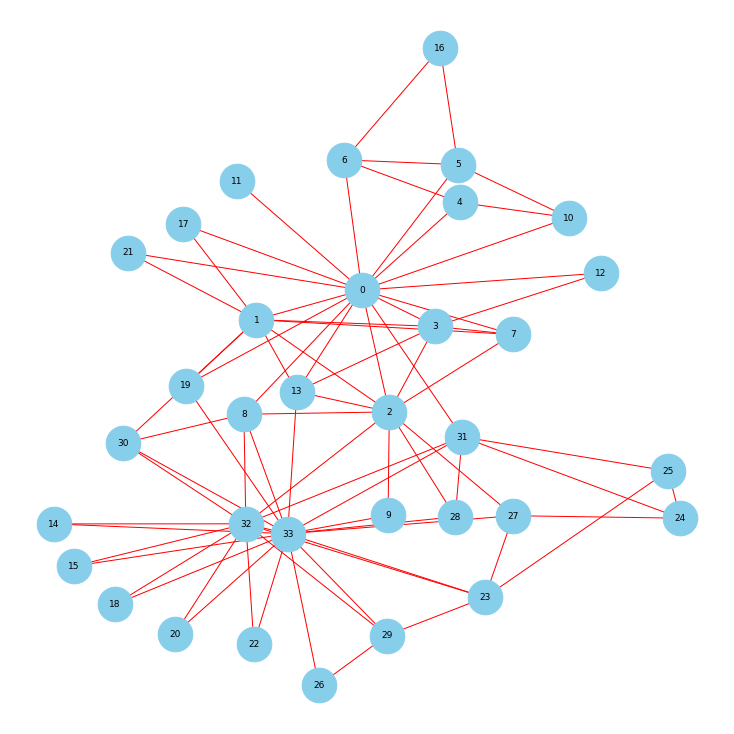

In [3]:
# Visualize the Network
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True, 
        node_color='skyblue', node_size=1200, 
        arrowstyle='->',arrowsize=20, edge_color='r',
        font_size=9,
        pos=nx.kamada_kawai_layout(G))

## b.Network Metrics and Measurement

**Centrality Measurement**

In graph theory and network analysis, indicators of centrality identify the most important vertices within a graph. Applications include identifying the most influential person(s) in a social network, key infrastructure nodes in the Internet or urban networks, and super-spreaders of disease. Centrality concepts were first developed in social network analysis, and many of the terms used to measure centrality reflect their sociological origin.

In [4]:
# Degree Centrality
degree = nx.degree_centrality(G)

# Sorted from the Highest
sorted(nx.degree(G), key=lambda x: x[1], reverse=True)[0:10]

[(33, 17),
 (0, 16),
 (32, 12),
 (2, 10),
 (1, 9),
 (3, 6),
 (31, 6),
 (8, 5),
 (13, 5),
 (23, 5)]

In [5]:
# Betweenness Centrality 
betweenness = nx.betweenness_centrality(G)

# Sorted from the Highest
sorted(nx.betweenness_centrality(G, normalized=True).items(), key=lambda x:x[1], reverse=True)[0:10]

[(0, 0.43763528138528146),
 (33, 0.30407497594997596),
 (32, 0.145247113997114),
 (2, 0.14365680615680618),
 (31, 0.13827561327561325),
 (8, 0.05592682780182781),
 (1, 0.053936688311688304),
 (13, 0.04586339586339586),
 (19, 0.03247504810004811),
 (5, 0.02998737373737374)]

In [6]:
# Closeness Centrality
closeness = nx.closeness_centrality(G)

# Sorted from the Highest
sorted(nx.closeness_centrality(G).items(), key=lambda x:x[1], reverse=True)[0:10]

[(0, 0.5689655172413793),
 (2, 0.559322033898305),
 (33, 0.55),
 (31, 0.5409836065573771),
 (8, 0.515625),
 (13, 0.515625),
 (32, 0.515625),
 (19, 0.5),
 (1, 0.4852941176470588),
 (3, 0.4647887323943662)]

In [7]:
# Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(G)

# Sorted from the Highest
sorted(nx.eigenvector_centrality(G).items(), key=lambda x:x[1], reverse=True)[0:10]

[(33, 0.373371213013235),
 (0, 0.3554834941851943),
 (2, 0.31718938996844476),
 (32, 0.3086510477336959),
 (1, 0.2659538704545025),
 (8, 0.2274050914716605),
 (13, 0.22646969838808148),
 (3, 0.2111740783205706),
 (31, 0.19103626979791702),
 (30, 0.17476027834493085)]

Visualize Network based on Centrality Measurement

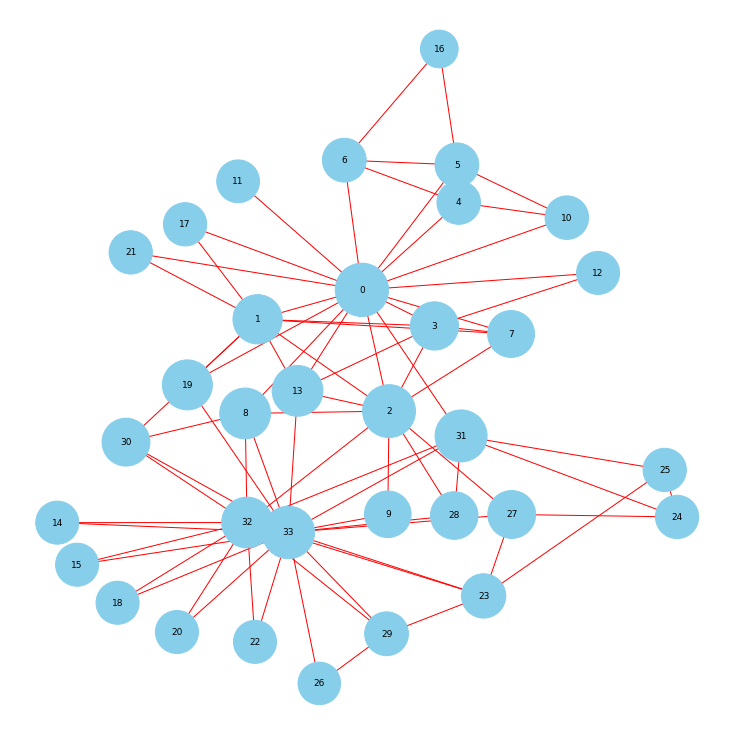

In [11]:
# Set Degree Dictionary
d = dict(closeness)

# Visualize the Network
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True, 
        node_color='skyblue', nodelist=d.keys(),
        node_size=[v * 5000 for v in d.values()], 
        arrowstyle='->',arrowsize=20, edge_color='r',
        font_size=9,
        pos=nx.kamada_kawai_layout(G))

**Network Topology Measurement**

The configuration, or topology, of a network is key to determining its performance. Network topology is the way a network is arranged, including the physical or logical description of how links and nodes are set up to relate to each other.

In [12]:
# Show Number of Nodes
nx.number_of_nodes(G)

34

In [13]:
# Show Number of Edges
nx.number_of_edges(G)

78

In [14]:
# Show Network Diameter
nx.diameter(G)

5

In [15]:
# Show Average Shortest Path
nx.average_shortest_path_length(G)

2.408199643493761

In [16]:
# Show Graph Density
nx.density(G)

0.13903743315508021

In [17]:
# Show Number of Connected Component
nx.number_connected_components(G)

1

## c.Community Detection

Community detection is a fundamental problem in social network analysis consisting, roughly speaking, in dividing social actors (modelled as nodes in a social graph) with certain social connections (modelled as edges in the social graph) into densely knitted and highly related groups with each group well separated from different group members.

Search for Communities

In [18]:
# Import Module
from networkx.algorithms.community import greedy_modularity_communities

# Modularity Community Detection
communities_m = sorted(greedy_modularity_communities(G), key=len, reverse=True)
communities_m

[frozenset({8,
            14,
            15,
            18,
            20,
            22,
            23,
            24,
            25,
            26,
            27,
            28,
            29,
            30,
            31,
            32,
            33}),
 frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}),
 frozenset({0, 4, 5, 6, 10, 11, 16, 19})]

Visualize Communities

In [0]:
# Set Node Community Function
def set_node_community(G, communities_m):
      '''Add community to node attributes'''
      for c, v_c in enumerate(communities_m):
        for v in v_c:
          # Add 1 to save 0 for external edges
          G.nodes[v]['community'] = c + 1      

In [0]:
# Set Colour Function
def get_color(i, r_off=1, g_off=1, b_off=1):
     '''Assign a color to a vertex.'''
     r0, g0, b0 = 0, 0, 0
     n = 16
     low, high = 0.1, 0.9
     span = high - low
     r = low + span * (((i + r_off) * 3) % n) / (n - 1)
     g = low + span * (((i + g_off) * 5) % n) / (n - 1)
     b = low + span * (((i + b_off) * 7) % n) / (n - 1)
     return (r, g, b) 

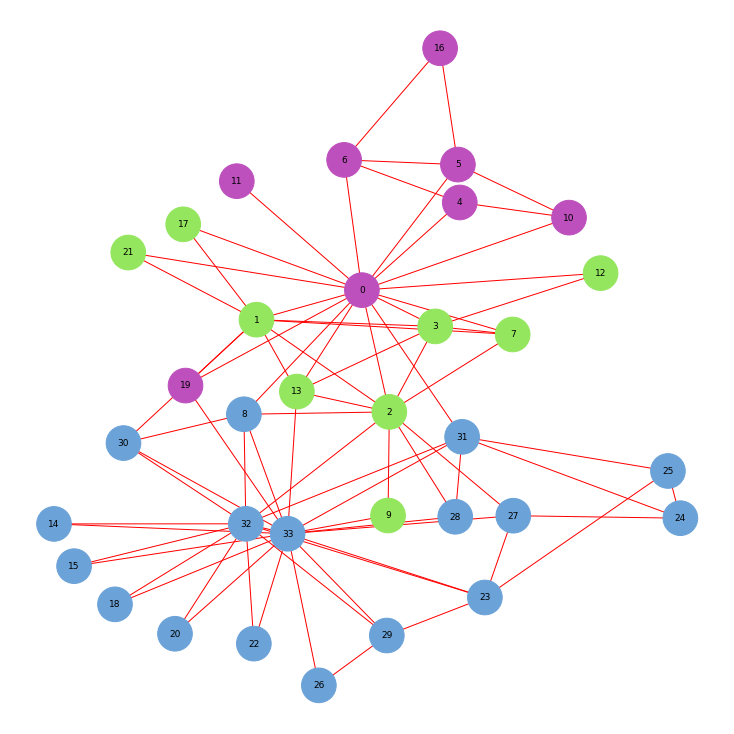

In [21]:
# Set Node Communities
community = set_node_community(G, communities_m)

# Set Node Color
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]

# Visualize the Network
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True, 
        node_color = node_color, node_size=1200, 
        arrowstyle='->',arrowsize=20, edge_color='r',
        font_size=9, map = plt.get_cmap('jet'),
        pos=nx.kamada_kawai_layout(G))